## GOAL: Create a model to predict whether or not a customer will Churn

# Importing Libraries and reading data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# importing data
df=pd.read_csv(r"C:\Users\jiten\OneDrive\Desktop\python for ML and Data Science\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\Telco-Customer-Churn.csv")

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.shape

(7032, 21)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Get a quick statistical summary of the numeric columns with .describe() 

In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [46]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Part 1:  Exploratory Data Analysis

## General Feature Exploration

**Displaying the balance of the class labels (Churn) with a Count Plot.**

In [47]:
# class label=Churn

In [48]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

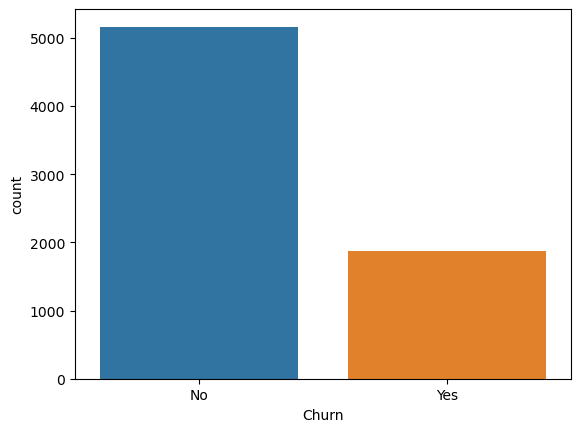

In [49]:
sns.countplot(data=df,x='Churn')

In [50]:
# clearly class label  is imbalaced

In [51]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
#numerical columns= tenure,MonthlyCharges,TotalCharges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

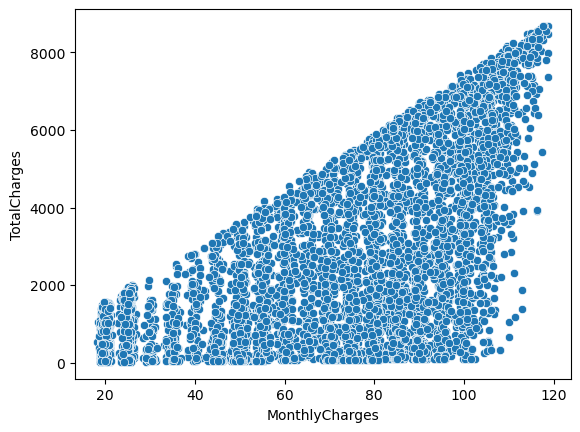

In [53]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges')

### distribution of TotalCharges between Churn categories

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

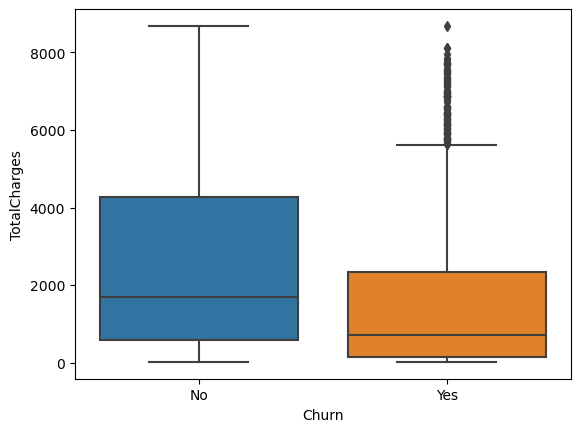

In [54]:
sns.boxplot(data=df,y='TotalCharges',x ='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

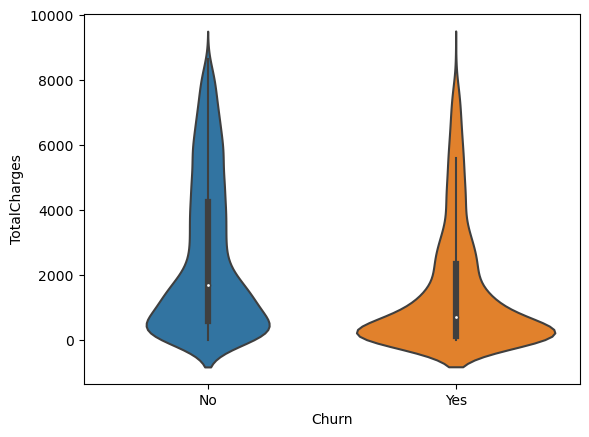

In [55]:
sns.violinplot(data=df,y='TotalCharges',x ='Churn')

## distribution of TotalCharges per Contract type

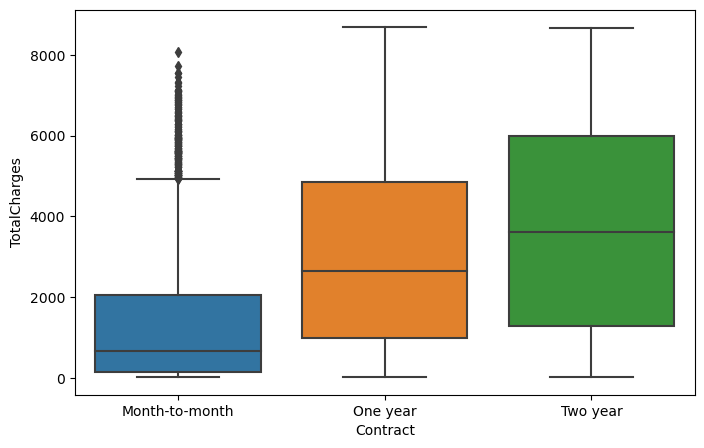

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='TotalCharges',x ='Contract')
# plt.legend(loc=(1.01,.5))
plt.show();

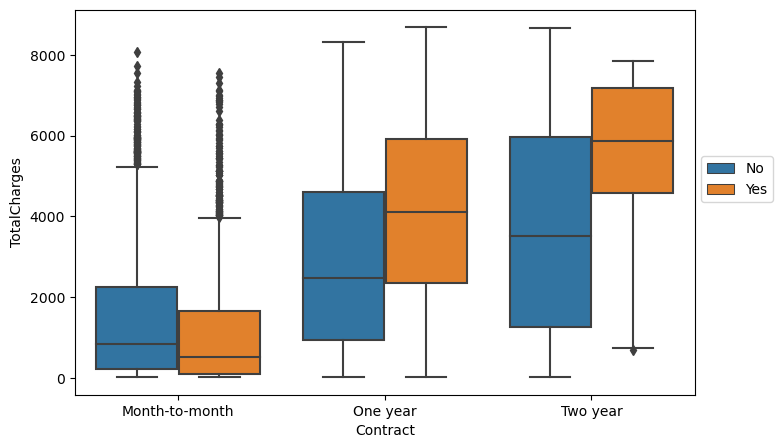

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='TotalCharges',x ='Contract',hue='Churn')
plt.legend(loc=(1.01,.5))
plt.show();

In [58]:
# customers with one year or more contact who churn have higher median total charges comapred to no churn 

 **plotting a bar chart ,showing the correlation of the following features to the class label. converting into dummy variables first, as we can only calculate correlation for numeric features**


['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [59]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

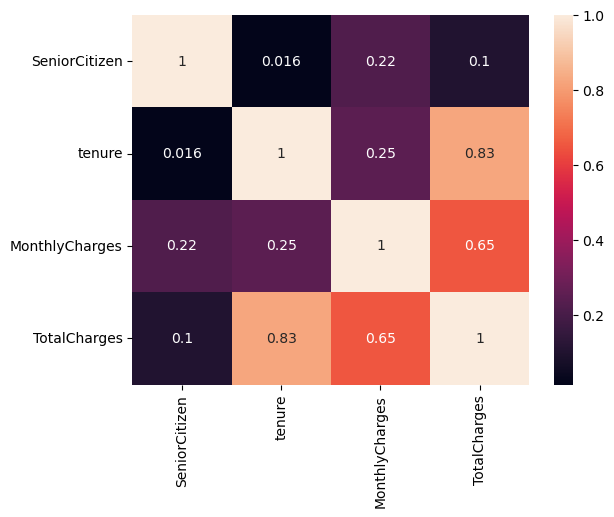

In [60]:
sns.heatmap(df.corr(),annot=True)

In [61]:
X=df.drop(['Churn','customerID'],axis=1)

In [62]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [63]:
df1=pd.get_dummies(data=df.drop('customerID',axis=1),drop_first=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [64]:
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [65]:
df1.shape

(7032, 31)

In [66]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [67]:
df1.corr()['Churn_Yes']

tenure                                  -0.354049
MonthlyCharges                           0.192858
TotalCharges                            -0.199484
gender_Male                             -0.008545
SeniorCitizen_1                          0.150541
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716


In [68]:
# correlation of variables to churn yes
corr_churn=df1.corr()['Churn_Yes'].sort_values(ascending=False)[1:]

In [69]:
corr_churn.index

Index(['InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'MonthlyCharges', 'PaperlessBilling_Yes', 'SeniorCitizen_1',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes',
       'PhoneService_Yes', 'gender_Male', 'MultipleLines_No phone service',
       'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)',
       'Partner_Yes', 'Dependents_Yes', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'Contract_One year', 'TotalCharges',
       'OnlineBackup_No internet service',
       'StreamingMovies_No internet service', 'InternetService_No',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'OnlineSecurity_No internet service',
       'DeviceProtection_No internet service', 'Contract_Two year', 'tenure'],
      dtype='object')

In [70]:
corr_churn.values

array([ 0.30746259,  0.30145464,  0.19285822,  0.19145432,  0.15054105,
        0.06325398,  0.06085994,  0.04003274,  0.0116914 , -0.00854464,
       -0.0116914 , -0.06619252, -0.08230697, -0.09077285, -0.13468684,
       -0.14998193, -0.16312844, -0.16471591, -0.17126992, -0.17822502,
       -0.19948408, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.30155234, -0.35404936])

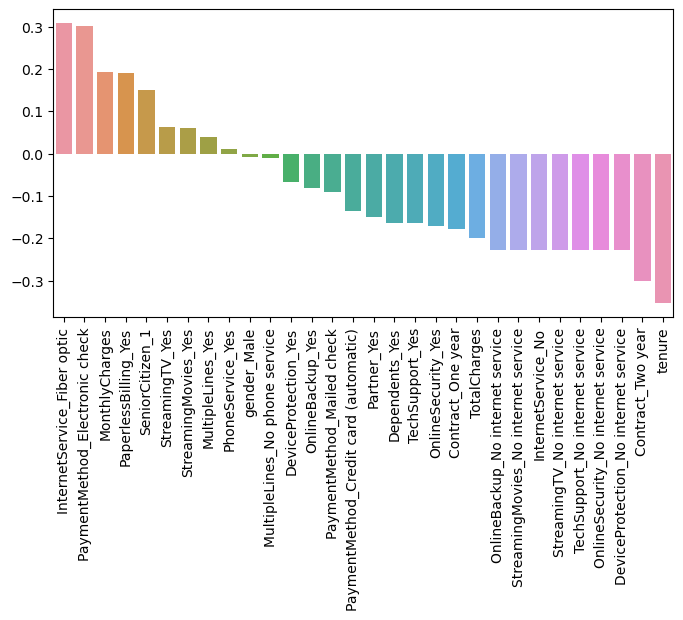

In [71]:
# plotting correlation values with Churn
plt.figure(figsize=(8,4))
sns.barplot(x= corr_churn.index,y=corr_churn.values)
plt.xticks(rotation=90);

# Part : Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [72]:
# contract types available
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

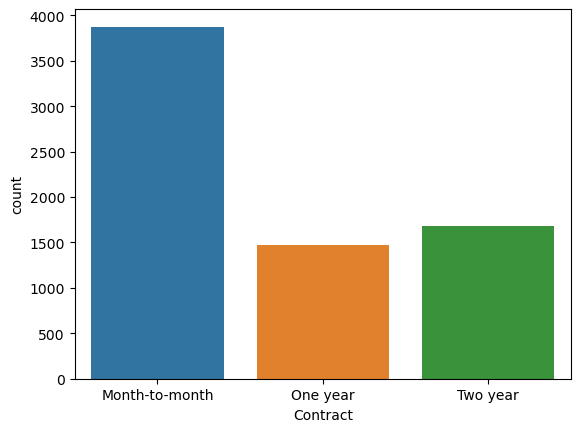

In [73]:
sns.countplot(data=df, x='Contract')

**Creating a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

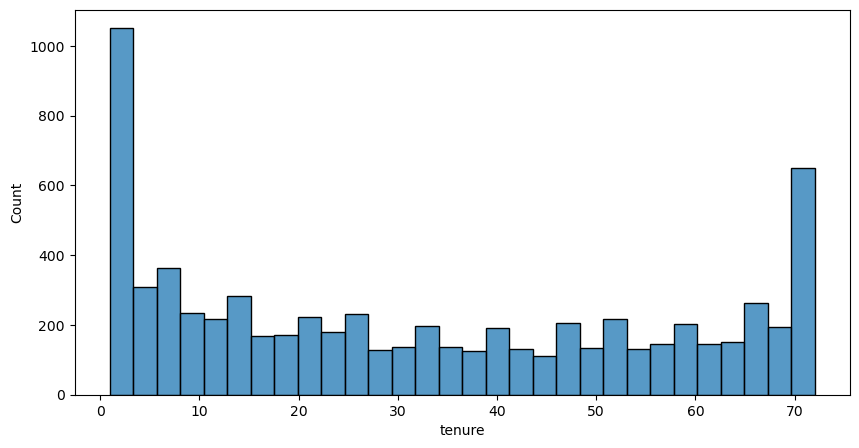

In [74]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='tenure',bins=30)

 **creating histograms separated by two additional features, Churn and Contract**
 using catplot

<Figure size 1200x800 with 0 Axes>

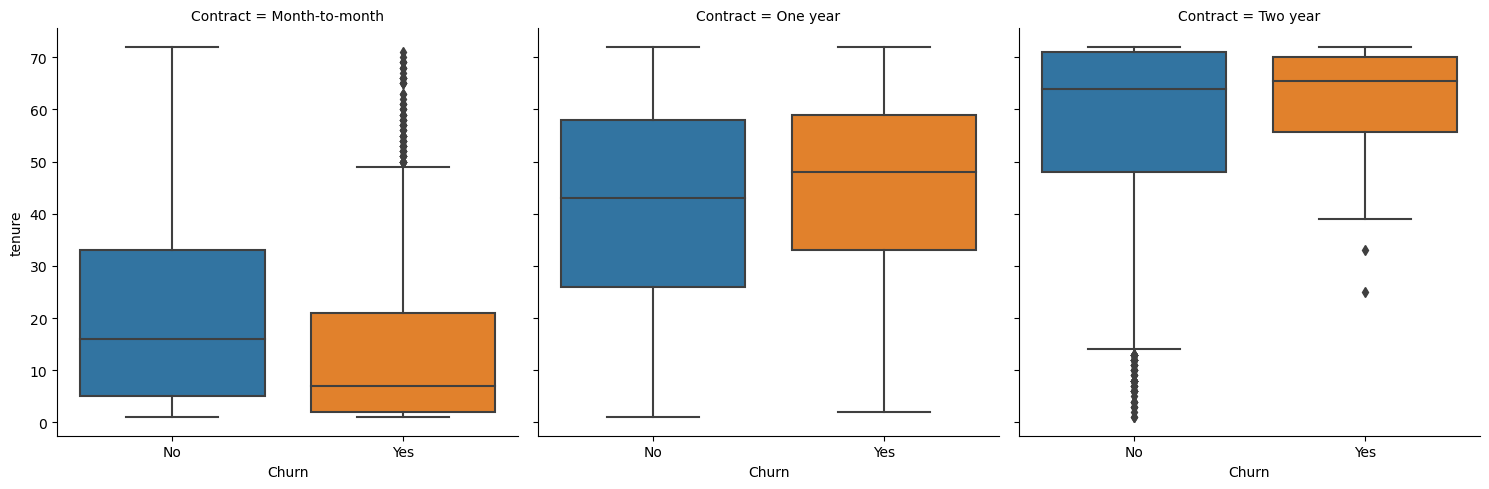

In [75]:
plt.figure(figsize=(12,8))
sns.catplot(data=df,y="tenure",x="Churn",kind='box',col="Contract")
plt.show();

<Figure size 1500x1500 with 0 Axes>

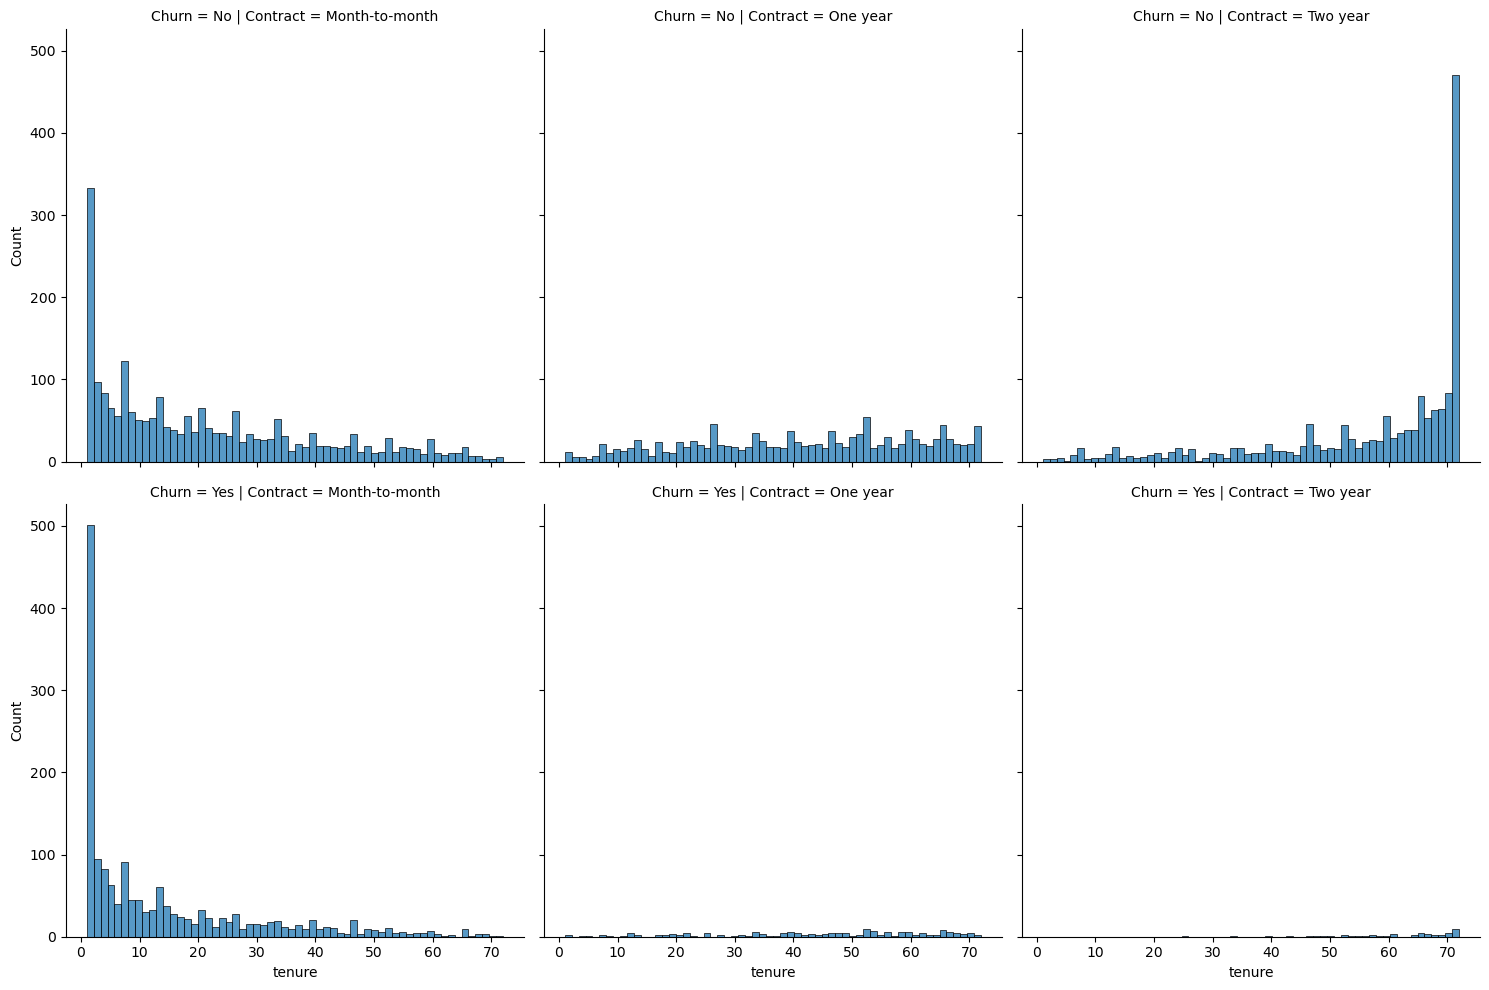

In [76]:
plt.figure(figsize=(10,10),dpi=150)
sns.displot(data=df,x='tenure',col='Contract',row='Churn',bins=60)
plt.show();

**Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn**.

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
# df['TotalCharges']

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

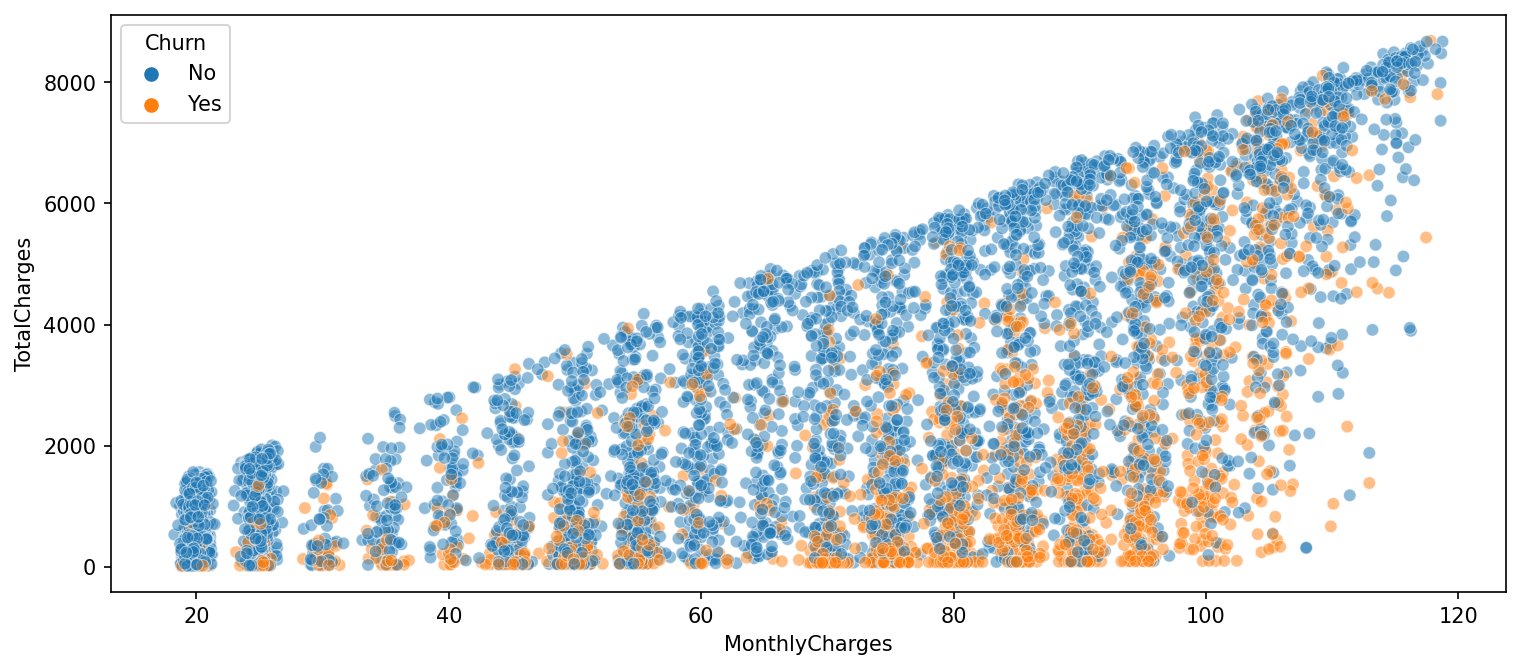

In [79]:
plt.figure(figsize=(12,5),dpi=150)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue="Churn",alpha=.5)

**Creating Cohorts based on Tenure** and then % Churn**

In [80]:
#total count by 
totalCount=df.groupby('tenure',axis=0)['Churn'].count()

In [81]:
totalCount

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Churn, Length: 72, dtype: int64

In [82]:
Churn_yes=df[df['Churn']=='Yes'].groupby('tenure',axis=0)['Churn'].count()

In [83]:
percent_churn=100*Churn_yes /totalCount

In [84]:
percent_churn

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

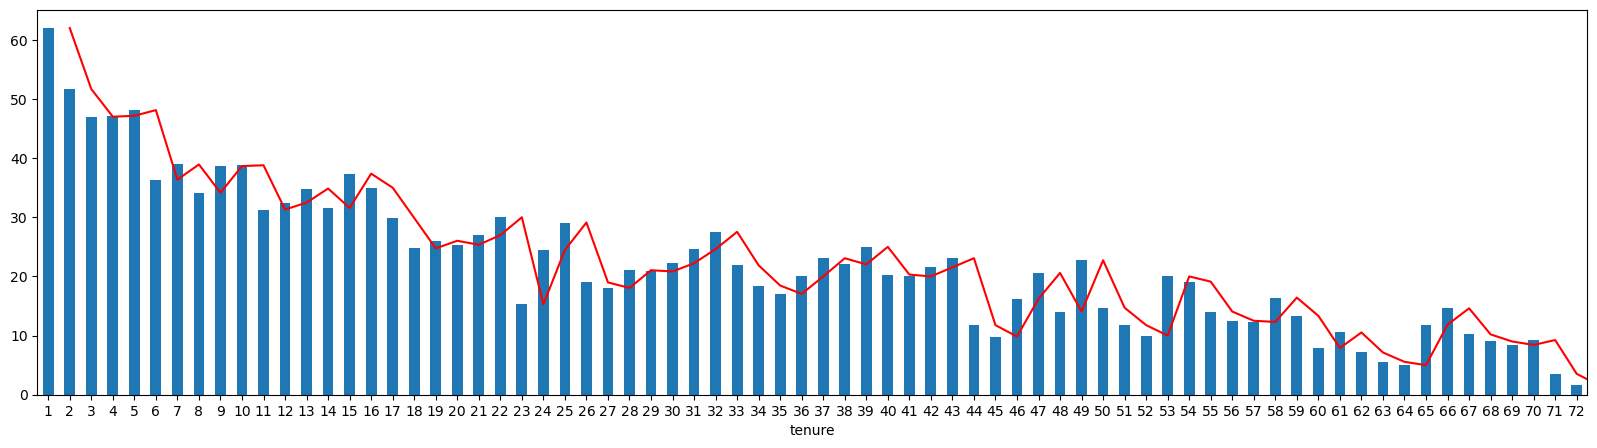

In [85]:
plt.figure(figsize=(20,5))
percent_churn.plot(kind='bar')
percent_churn.plot(kind='line',color='red')

<AxesSubplot:ylabel='Churn'>

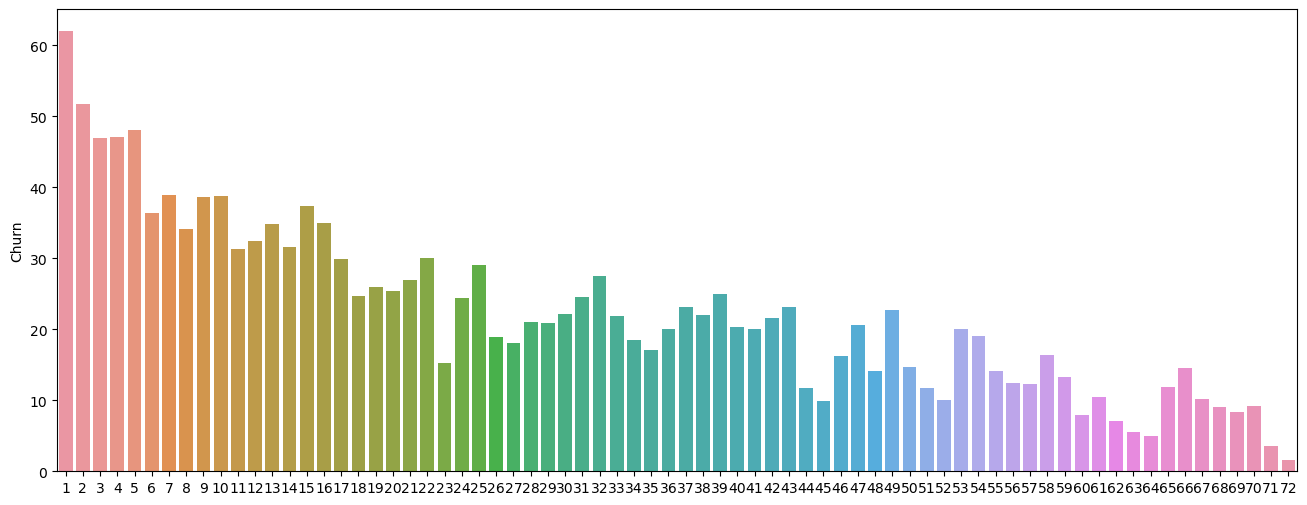

In [86]:
plt.figure(figsize=(16,6))
sns.barplot(x=np.arange(1,73),y=percent_churn,ci=None)


**Broader Cohort Groups
TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**

* '0-12 Months'
* '12-24 Months'
* '24-48 Months'
* 'Over 48 Months'

In [87]:
condition=[df['tenure']<=12,df['tenure']<=24,df['tenure']<=48,df['tenure']>48]
value = ['0-12 Months','12-24 Months','24-48 Months','Over 48 Months']
df['Tenure Cohort'] = np.select(condition,value)
           
    


In [88]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

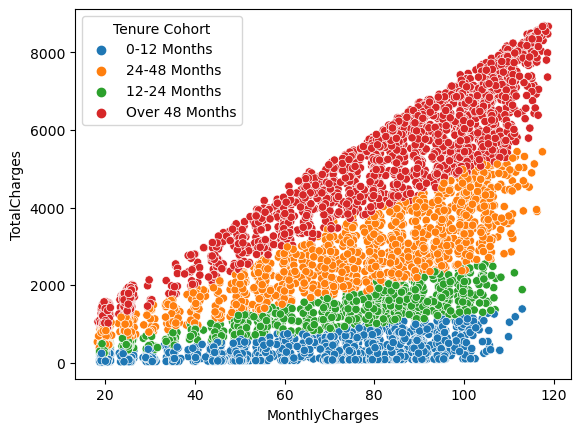

In [89]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

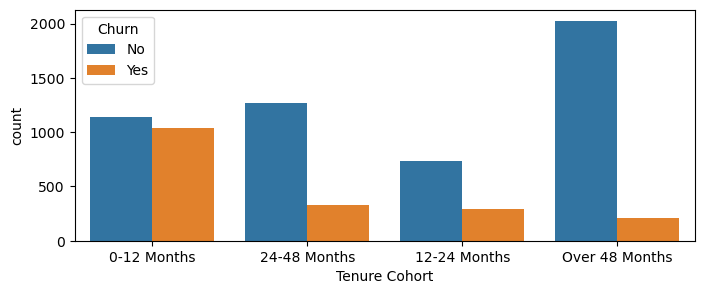

In [90]:
plt.figure(figsize=(8,3))
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

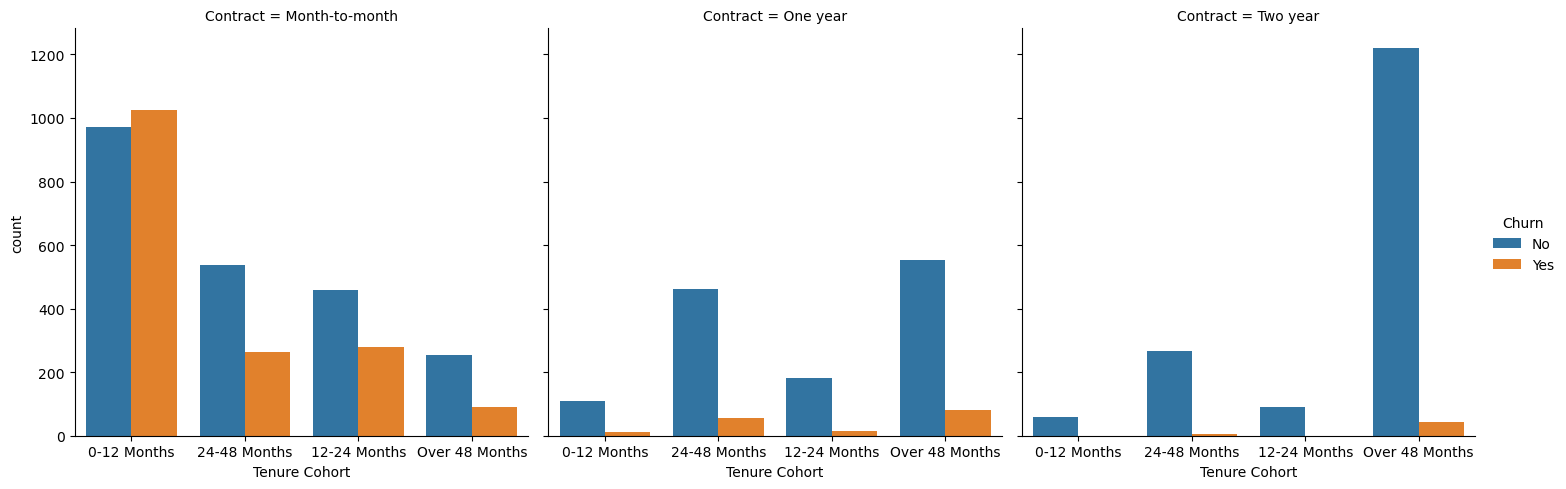

In [91]:
sns.catplot(data=df,kind='count',x='Tenure Cohort',col="Contract",hue='Churn')

In [92]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

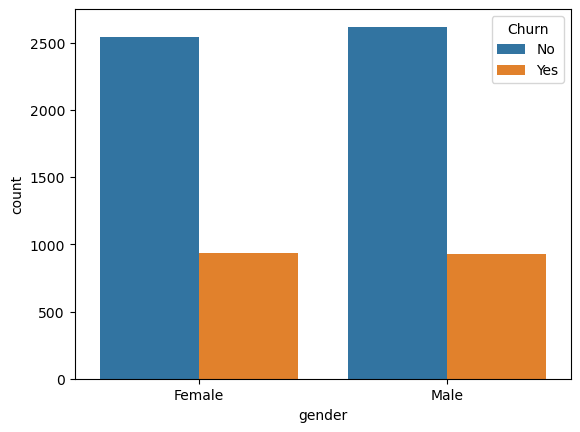

In [93]:
sns.countplot(data=df,x='gender',hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

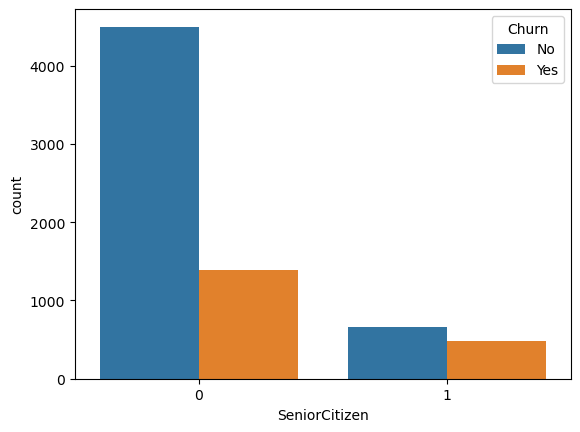

In [94]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')

In [95]:
len(df[df['SeniorCitizen']==1])

1142

In [96]:
df[(df['SeniorCitizen']==1) &(df['Churn']=="Yes")].shape[0]

476

In [97]:
100*df[(df['SeniorCitizen']==1) &(df['Churn']=="Yes")].shape[0]/len(df[df['SeniorCitizen']==1])

41.68126094570928

In [98]:
# Senior customer have 41.68% rate of churn , 

<AxesSubplot:xlabel='Partner', ylabel='count'>

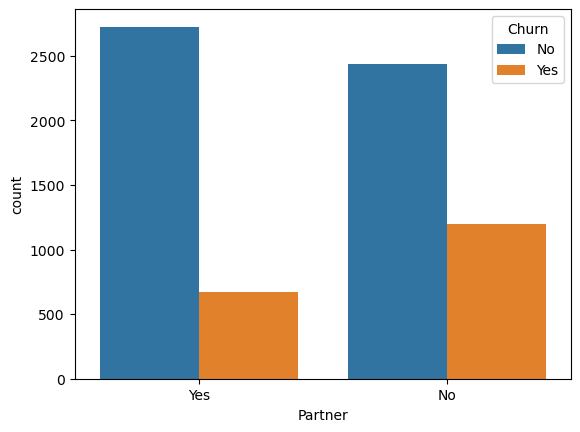

In [99]:
sns.countplot(data=df,x='Partner',hue='Churn')
# having customer as partner, have comaparatively less churn 

In [100]:
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [101]:
 df1.groupby('tenure').sum()

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30947.80,30947.80,329.0,86,98.0,104,555.0,58.0,81.0,235,166,166,37,166,47,166.0,41.0,166,33,166,80,166,82,7.0,2.0,353.0,30.0,290.0,257.0,380.0
2,13615.10,27211.10,108.0,43,48.0,28,218.0,20.0,44.0,109,47,47,27,47,38,47.0,30.0,47,19,47,45,47,50,7.0,1.0,133.0,24.0,115.0,76.0,123.0
3,11603.00,34938.00,99.0,25,47.0,32,172.0,28.0,48.0,90,39,39,20,39,35,39.0,33.0,39,34,39,57,39,45,6.0,3.0,123.0,22.0,93.0,73.0,94.0
4,10108.15,40573.40,88.0,26,48.0,40,157.0,19.0,56.0,77,38,38,24,38,32,38.0,26.0,38,25,38,38,38,41,7.0,4.0,104.0,19.0,86.0,55.0,83.0
5,8113.50,40497.35,67.0,24,36.0,26,120.0,13.0,36.0,65,25,25,17,25,32,25.0,28.0,25,27,25,36,25,33,4.0,1.0,79.0,18.0,61.0,42.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,7332.10,500630.00,52.0,13,74.0,44,89.0,11.0,62.0,41,18,18,51,18,65,18.0,58.0,18,47,18,49,18,57,25.0,65.0,59.0,36.0,19.0,7.0,9.0
69,6728.20,463223.95,55.0,13,70.0,42,85.0,10.0,55.0,42,23,23,38,23,50,23.0,49.0,23,49,23,49,23,49,23.0,66.0,59.0,39.0,8.0,10.0,8.0
70,9089.10,636537.80,57.0,17,96.0,47,105.0,14.0,80.0,47,20,20,66,20,77,20.0,78.0,20,76,20,75,20,73,27.0,88.0,66.0,46.0,20.0,9.0,11.0


In [102]:
#  df1.groupby('tenure').sum()[['Churn_Yes','Dependents_Yes']]

In [103]:
# sns.catplot(data=df,x='Partner',col='Dependents',kind='bar',hue='Churn')

# Predictive modeling

In [104]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [105]:
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [106]:
X=df1.drop('Churn_Yes',axis=1)

In [107]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [108]:
y=df1['Churn_Yes']

In [109]:
# y

In [110]:
X.shape

(7032, 30)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [115]:
X_train=scaler.fit_transform(X_train)

In [116]:
X_test=scaler.transform(X_test)

# 1. Logistic Regression 

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
log_model=LogisticRegression()

In [119]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [120]:
def Base_model_performance(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



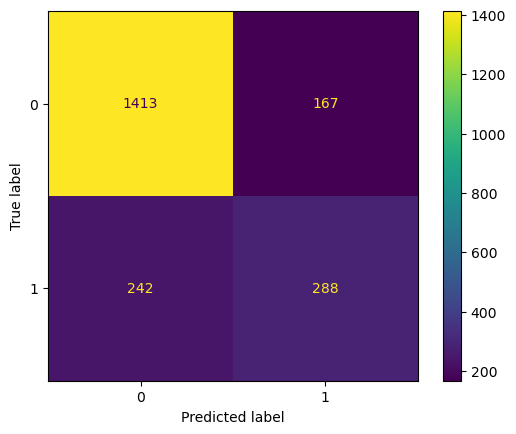

In [121]:
Base_model_performance(log_model)

## logistic regression hyper parameter Tuning

In [122]:
log_model

LogisticRegression()

In [123]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
# param_grid : dict or list of dictionaries
param_grid={'C':[.01,0.1,.5,1,10],'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [126]:
grid=GridSearchCV(LogisticRegression(max_iter=1000),param_grid)

In [127]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [128]:
y_predict=grid.predict(X_test)

In [129]:
# y_predict

In [130]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [131]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

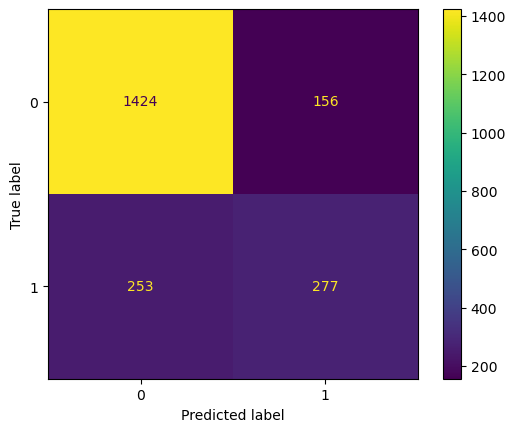

In [132]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

*Clearly No significant increase in performance after Hyperparameter Tuniung

In [133]:
final_logmodel=LogisticRegression(C=0.1, penalty='l1', solver= 'saga')

In [134]:
final_logmodel

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [135]:
final_logmodel.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [136]:
y_pred=final_logmodel.predict(X_test)

In [137]:
confusion_matrix(y_test,y_pred)

array([[1424,  156],
       [ 253,  277]], dtype=int64)

In [138]:
from sklearn.metrics import roc_curve,roc_auc_score,RocCurveDisplay

In [139]:
roc_curve(y_test,y_pred)

(array([0.        , 0.09873418, 1.        ]),
 array([0.        , 0.52264151, 1.        ]),
 array([2, 1, 0]))

In [140]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
roc_auc_score(y_test,y_pred)

0.7119536661093863

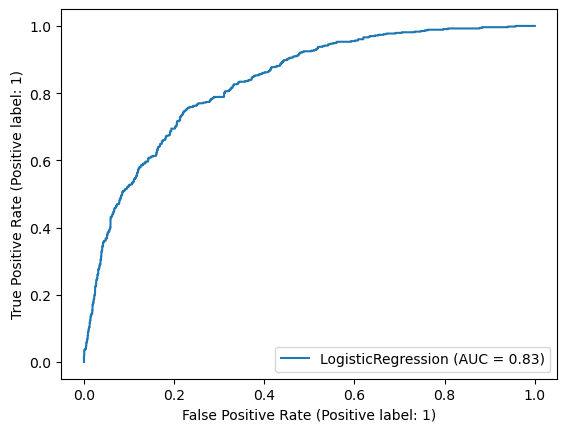

In [141]:
RocCurveDisplay.from_estimator(final_logmodel,X_test,y_test)

 # KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn=KNeighborsClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1580
           1       0.52      0.51      0.51       530

    accuracy                           0.76      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.76      0.76      0.76      2110



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


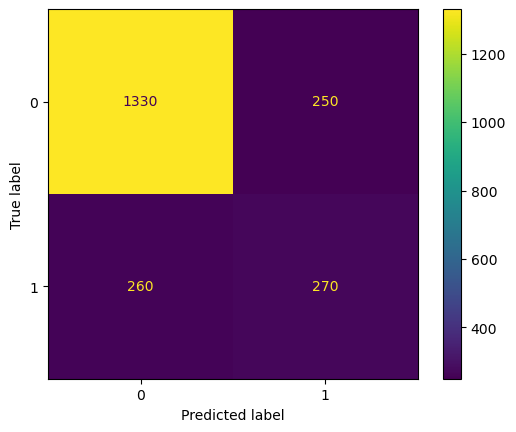

In [144]:
Base_model_performance(knn)

In [145]:
KNeighborsClassifier


sklearn.neighbors._classification.KNeighborsClassifier

# Hyper parameter Tuning
* Finding the optimal value of K 

In [146]:
Error=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error=1-accuracy_score(y_test,y_pred)
    Error.append(error)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [147]:
# Error

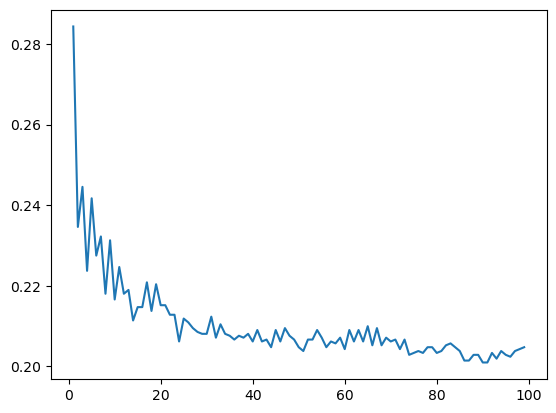

In [148]:
plt.plot(np.arange(1,100),Error)

* lets take k=10

In [149]:
Knn=KNeighborsClassifier(n_neighbors=10,weights='distance')

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1580
           1       0.53      0.50      0.51       530

    accuracy                           0.76      2110
   macro avg       0.68      0.67      0.68      2110
weighted avg       0.76      0.76      0.76      2110



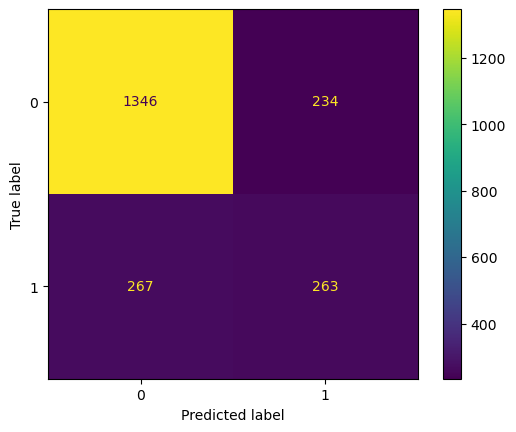

In [150]:
Base_model_performance(Knn)

# SVM

In [151]:
from sklearn.svm import SVC

In [152]:
svc=SVC()

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



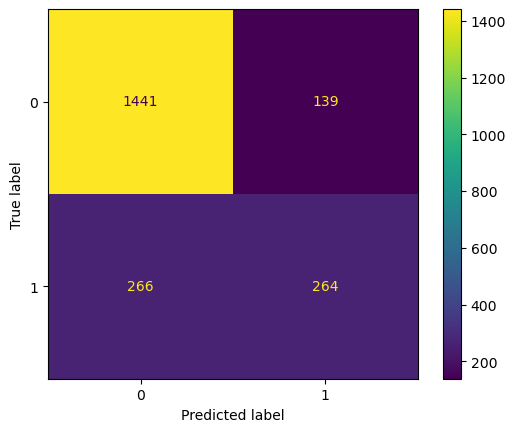

In [153]:
Base_model_performance(svc)

In [154]:
# slightly better performace cpomapred to KNN

In [155]:
SVC

sklearn.svm._classes.SVC

# hyperparameter tuning

In [156]:
param_grid={'gamma' : ['scale', 'auto'],'C':[.001,0.01,.1,.5,1,10],'degree':[2,3,4,5,6]}

In [157]:
grid=GridSearchCV(SVC(),param_grid)

In [158]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto']})

In [159]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto']})

In [160]:
grid.best_estimator_

SVC(C=1, degree=2, gamma='auto')

In [161]:
y_pred=grid.predict(X_test)

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



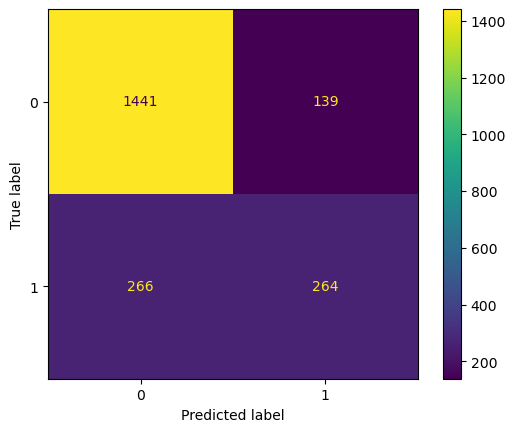

In [163]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



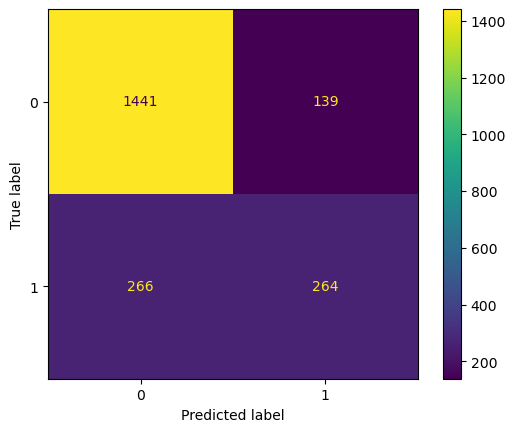

In [164]:

Base_model_performance(grid)

# decision Tree models 

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dtc=DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1580
           1       0.45      0.52      0.48       530

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.74      0.72      0.73      2110



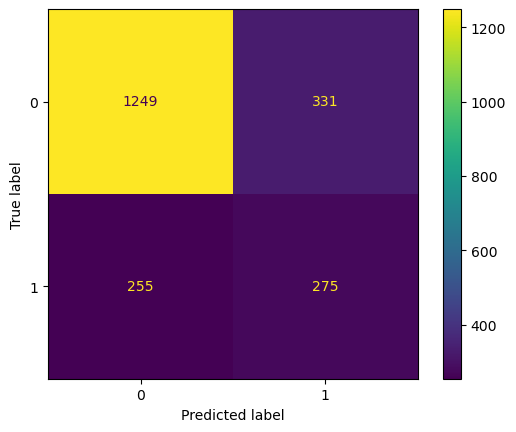

In [167]:
Base_model_performance(dtc)

## Decision Tree hyperparamer tunning 

In [168]:
param_grid={'criterion' : ["gini", "entropy"],'max_features' :  ["auto", "sqrt", "log2"],
            'class_weight':['balanced',None]}

In [169]:
grid_model=GridSearchCV(dtc,param_grid)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1580
           1       0.47      0.51      0.49       530

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.74      0.73      0.74      2110



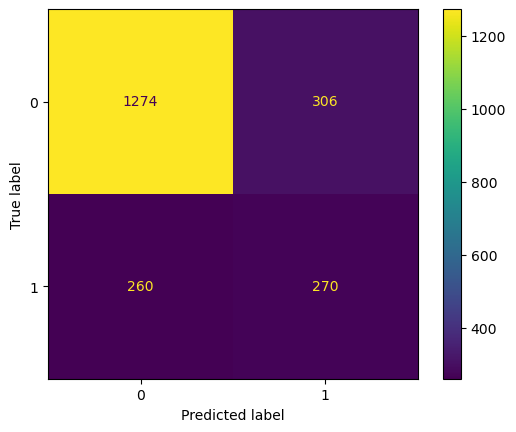

In [170]:
# check performace on Grid Model 
Base_model_performance(grid_model)

In [171]:
# best parameters
grid_model.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}

In [172]:
# feature imporrtance for Decision Tree
feat_importance=grid_model.best_estimator_.feature_importances_

In [173]:
feat_importance

array([0.14801726, 0.19078027, 0.17743535, 0.02980003, 0.01369983,
       0.02650355, 0.02057179, 0.00425233, 0.00759096, 0.02005477,
       0.00764032, 0.        , 0.        , 0.02000829, 0.        ,
       0.01789855, 0.        , 0.01855651, 0.        , 0.06082021,
       0.        , 0.0182051 , 0.06654555, 0.01500784, 0.01669834,
       0.02937395, 0.0333255 , 0.01941058, 0.02442496, 0.01337815])

In [174]:
X.columns.values

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [175]:
# converting feature importance to series 
feat=pd.Series(data=feat_importance,index=X.columns).sort_values(ascending=False)

In [176]:
# feat.index

In [177]:
# feat.values

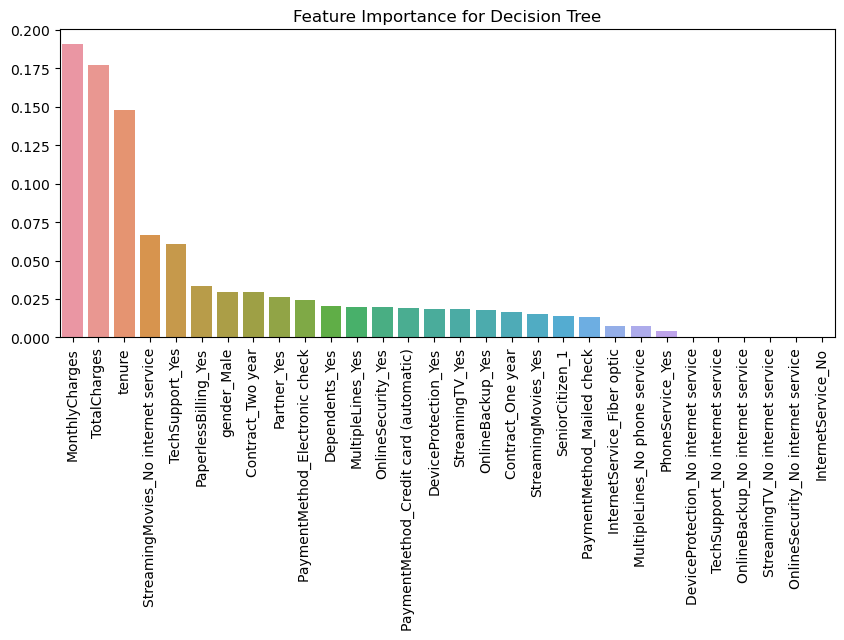

In [178]:
plt.figure(figsize=(10,4))
sns.barplot(x=feat.index,y=feat.values)
plt.xticks(rotation=90)
plt.title('Feature Importance for Decision Tree');

In [179]:
# plotting Decision Tree 
from sklearn import tree

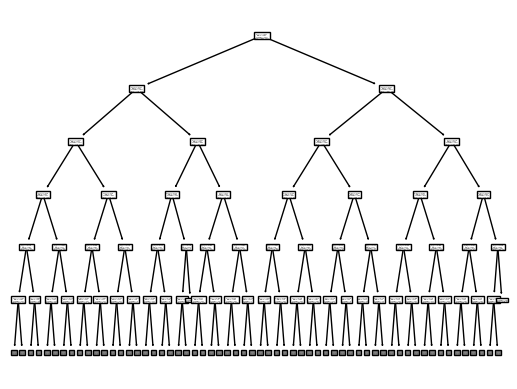

In [180]:
tree.plot_tree(dtc,max_depth=5);

# Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rfc=RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.61      0.49      0.55       530

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.79      2110



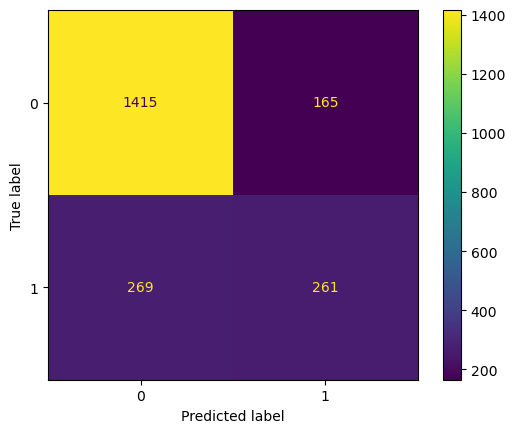

In [183]:
Base_model_performance(rfc)

* best Base Model performance than previous models 

# hyper parameter Tunning

* Searching n_estimators ( DTs) for an optimal performance

In [184]:
#elbow method
Error=[]
for k in range(1,200):
    rf=RandomForestClassifier(n_estimators=k)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    error=1-accuracy_score(y_test,y_pred)
    Error.append(error)
    


Text(0.5, 1.0, 'elbow methods for optimal value of n_estimators')

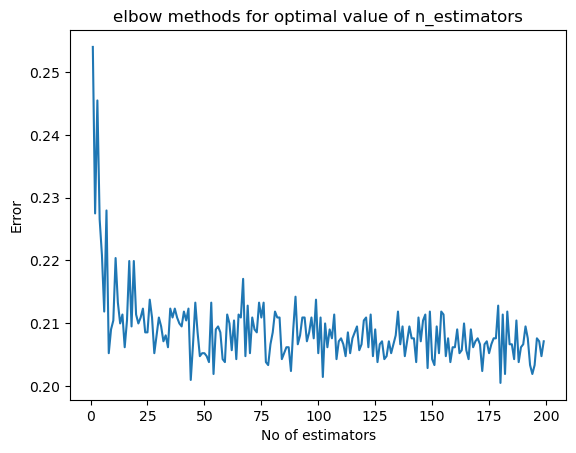

In [185]:
plt.plot(np.arange(1,200),Error)
plt.xlabel('No of estimators')
plt.ylabel('Error')
plt.title("elbow methods for optimal value of n_estimators")

** lets take default value of n_estimators=100

##### or we can apply GridsearchCV

In [186]:
param_grid={'max_features': ["auto", "sqrt", "log2"],'n_estimators':[64,100,128],'criterion' : ["gini", "entropy"]}

In [187]:
rfc=RandomForestClassifier(oob_score=True)

In [188]:
Grid_model=GridSearchCV(rfc,param_grid)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1580
           1       0.60      0.48      0.54       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



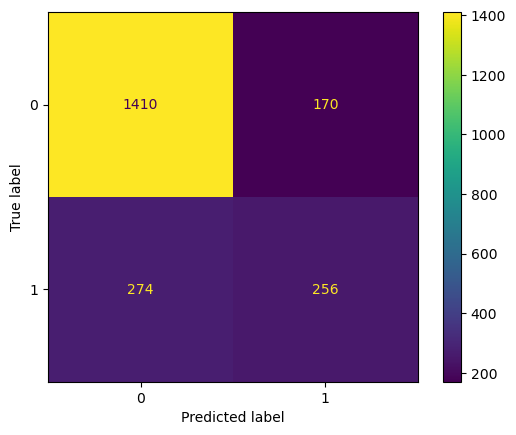

In [189]:
Base_model_performance(Grid_model)

In [190]:
Grid_model.best_estimator_

RandomForestClassifier(max_features='sqrt', oob_score=True)

In [191]:
feat_imp=Grid_model.best_estimator_.feature_importances_

In [192]:
# converting feature importance to series 
feat=pd.Series(data=feat_imp,index=X.columns).sort_values(ascending=False)

<AxesSubplot:>

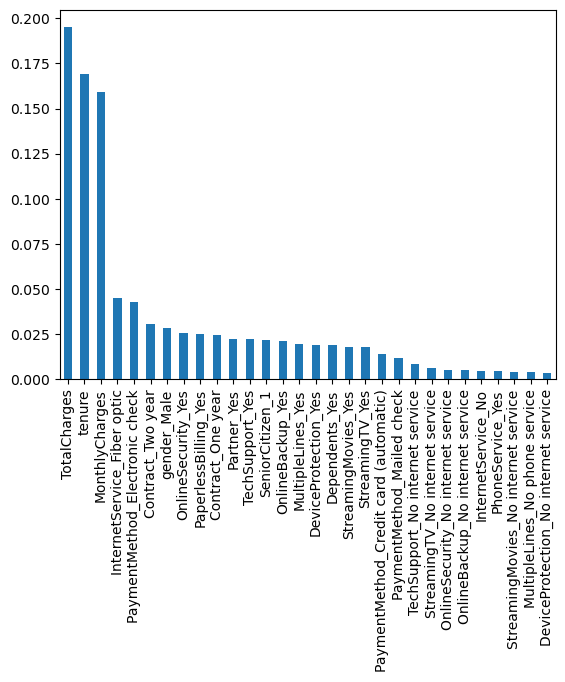

In [193]:
feat.plot(kind='bar')

In [194]:
# Get the OOB score
oob_score =Grid_model.best_estimator_.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.7819991873222267


* similar to Hyper Parameter tunned accuracy score which is .79

## Boosted Tree Model

In [195]:
from sklearn.ensemble import AdaBoostClassifier

In [196]:
ada=AdaBoostClassifier()

In [197]:
# help(AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



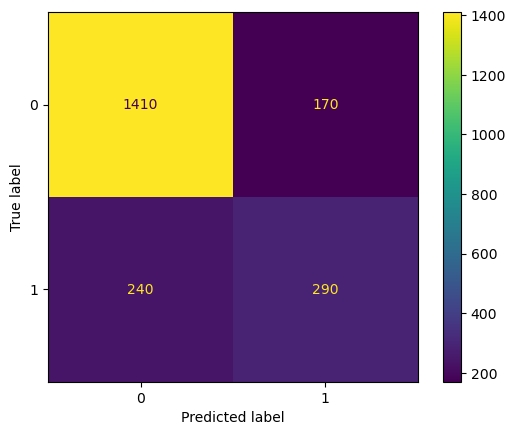

In [198]:
Base_model_performance(ada)

In [201]:
# tune n_estimators

In [202]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

Text(0, 0.5, 'Error')

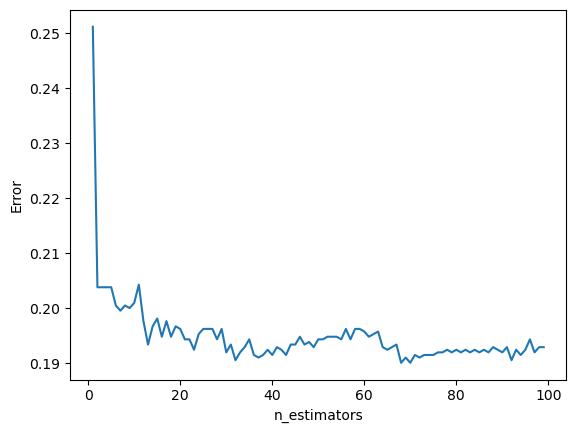

In [204]:
plt.plot(range(1,100),error_rates)
plt.xlabel('n_estimators')
plt.ylabel('Error')

* lets use n_estimators=40

In [211]:
model = AdaBoostClassifier(n_estimators=40)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



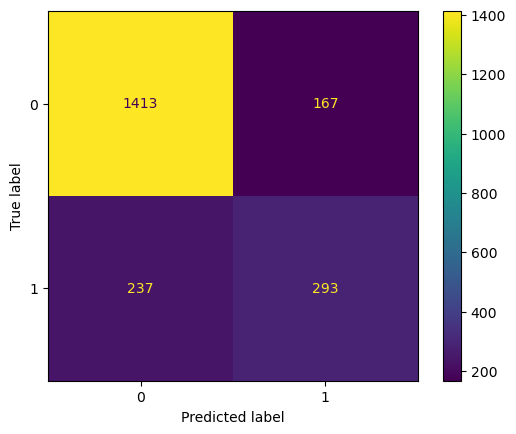

In [212]:
Base_model_performance(model)

In [207]:
# tune learning rate

In [208]:
error_rates = []

for r in np.linspace(.1,2,10):
    
    model = AdaBoostClassifier(n_estimators=40,learning_rate=r)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

Text(0, 0.5, 'Error')

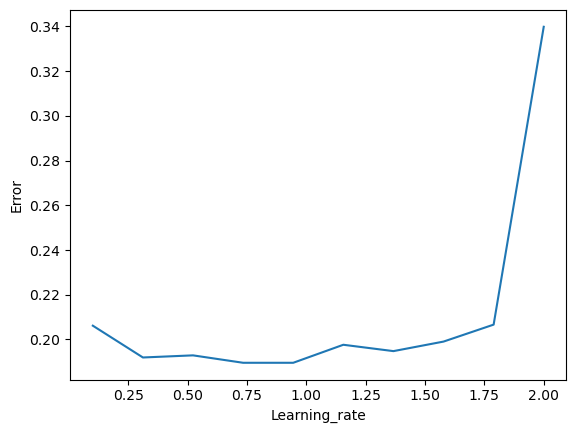

In [209]:
plt.plot(np.linspace(.1,2,10),error_rates)
plt.xlabel('Learning_rate')
plt.ylabel('Error')

* default Learning rate =1 is good choice

* slight improvement in performance

In [199]:
# clearly ofter observing performace we can use Random Forest or boosted model(AdaBoost) for final model training 
# on whole data and Deploying it

In [213]:
model

AdaBoostClassifier(n_estimators=40)

In [214]:
model.feature_importances_

array([0.175, 0.15 , 0.225, 0.   , 0.025, 0.   , 0.   , 0.025, 0.025,
       0.025, 0.075, 0.025, 0.   , 0.025, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.025, 0.   , 0.05 , 0.   , 0.025, 0.025, 0.05 , 0.025,
       0.   , 0.025, 0.   ])

In [216]:
feat=pd.Series(data=model.feature_importances_,index=X.columns)

In [217]:
feat

tenure                                   0.175
MonthlyCharges                           0.150
TotalCharges                             0.225
gender_Male                              0.000
SeniorCitizen_1                          0.025
Partner_Yes                              0.000
Dependents_Yes                           0.000
PhoneService_Yes                         0.025
MultipleLines_No phone service           0.025
MultipleLines_Yes                        0.025
InternetService_Fiber optic              0.075
InternetService_No                       0.025
OnlineSecurity_No internet service       0.000
OnlineSecurity_Yes                       0.025
OnlineBackup_No internet service         0.000
OnlineBackup_Yes                         0.000
DeviceProtection_No internet service     0.000
DeviceProtection_Yes                     0.000
TechSupport_No internet service          0.000
TechSupport_Yes                          0.025
StreamingTV_No internet service          0.000
StreamingTV_Y

<AxesSubplot:>

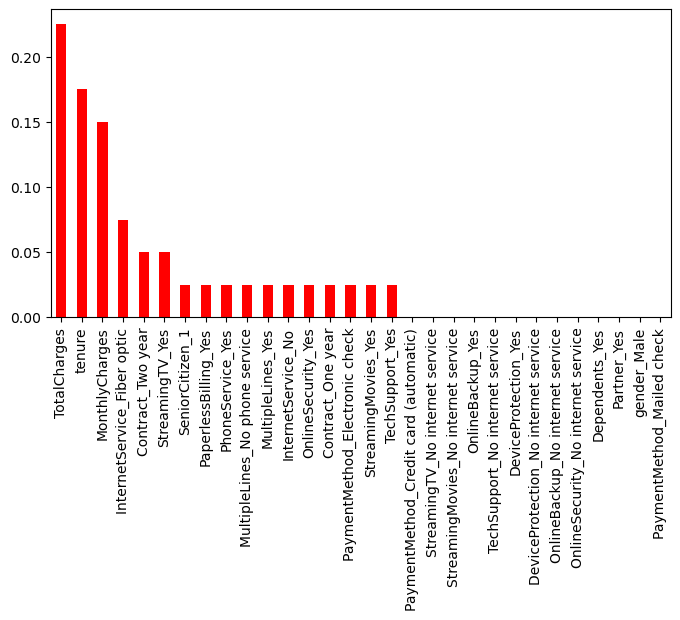

In [220]:
plt.figure(figsize=(8,4))
feat.sort_values(ascending=False).plot(kind='bar',color='red')

** Lets use boosted Tree nodel as  our final model  choice

In [221]:
final_model=AdaBoostClassifier(n_estimators=40)

In [222]:
final_model.fit(X,y)

AdaBoostClassifier(n_estimators=40)

* Saving machine learning model using joblib.dump() and load it for future prediction

In [223]:
import joblib
# Save the model to a file
joblib.dump(final_model, 'Churn_pred_model.joblib')


['Churn_pred_model.joblib']

In [225]:
scaler

StandardScaler()

In [226]:
# Save the scaler to a file
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

# Loading the Model and Scaler for Prediction

In [227]:

# Load the model from the file
model = joblib.load('Churn_pred_model.joblib')

# Load the scaler from the file
scaler = joblib.load('scaler.joblib')



In [228]:
model

AdaBoostClassifier(n_estimators=40)

In [229]:
scaler

StandardScaler()

### Assuming we have new data in the form of a pandas DataFrame named 'new_data'

#### Apply the same scaling to the new data as done during training
scaled_data = scaler.transform(new_data)

#### Use the loaded model for prediction
predictions = model.predict(scaled_data)